# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as image
import os
%matplotlib inline
plt.style.use('ggplot')
from ipywidgets import interact,fixed, interact_manual, IntSlider
import ipywidgets as widgets

Using TensorFlow backend.


# Loading and Analizing the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
@interact
def show_images(n=IntSlider(min=4,max=16,value=6,step=2,layout=dict(width='50%'))):
    array=np.random.randint(low=1,high=10000,size=n)
    fig=plt.figure(figsize=(n,6))
    for i in range(n):
        fig.add_subplot(2,n//2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(y_train[array[i]])
        plt.imshow(x_train[array[i]])
    

interactive(children=(IntSlider(value=6, description='n', layout=Layout(width='50%'), max=16, min=4, step=2), …

# Convert Labels to One Hot Encoding

In [4]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

# Normalizing Test and Training Images

In [5]:
x_train_norm=x_train/255.
x_test_norm=x_test/255.

# Creating Model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adadelta
from keras.optimizers import SGD

In [7]:
model = Sequential([Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    BatchNormalization(),
                    Dense(10,activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
             metrics=['accuracy'])
model.summary()                

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

# Reshaping and Splitting Validation and Test Set

In [8]:
x_train_norm = x_train_norm.reshape((x_train_norm.shape[0],28,28,1))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0],28,28,1))
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
from sklearn.model_selection import train_test_split as  tts

In [10]:
x_val,x_test_,y_val,y_test_=tts(x_test_norm,y_test_enc,test_size=0.5)

In [11]:
print(x_val.shape)
print(y_val.shape)
print(x_test_.shape)
print(y_test_.shape)

(5000, 28, 28, 1)
(5000, 10)
(5000, 28, 28, 1)
(5000, 10)


# Training Model

In [12]:
history=model.fit(x=x_train_norm,y=y_train_enc,
         batch_size = 32,
         validation_data=(x_val,y_val),
         epochs=15)

Train on 60000 samples, validate on 5000 samples
Epoch 1/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1149 - accuracy: 0.9657 - val_loss: 0.1239 - val_accuracy: 0.9602
Epoch 2/15
60000/60000 [==============================] - 42s 704us/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0345 - val_accuracy: 0.9872
Epoch 3/15
60000/60000 [==============================] - 41s 682us/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 4/15
60000/60000 [==============================] - 43s 719us/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0288 - val_accuracy: 0.9910
Epoch 5/15
60000/60000 [==============================] - 39s 655us/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0238 - val_accuracy: 0.9926
Epoch 6/15
60000/60000 [==============================] - 37s 621us/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 7/15
60000/60000 [==============================] - 3

In [13]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

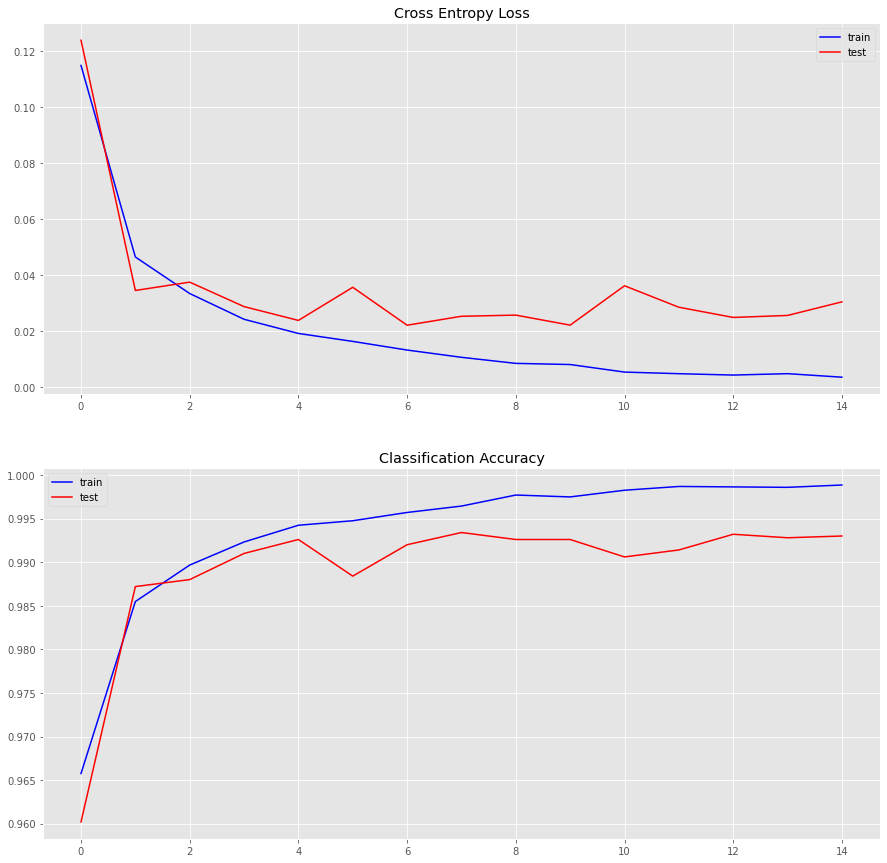

In [14]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [15]:
metrics=model.evaluate(x_test_,y_test_)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

5000/5000 [==============================] - 2s 340us/step
Test Acuracy is : 99.12
Test Loss is : 0.04


In [16]:
model.save('my_model')

In [17]:
loaded_model=tf.keras.models.load_model('my_model')

In [18]:
metrics=loaded_model.evaluate(x_test_,y_test_)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

5000/5000 [==============================] - 3s 593us/sample - loss: 0.0364 - accuracy: 0.9912
Test Acuracy is : 99.12
Test Loss is : 0.04


# Predictions

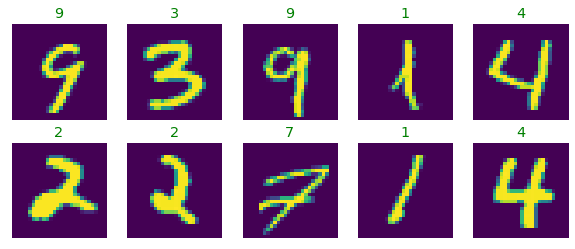

In [23]:
def test_images(n=10):
    index=np.random.randint(low=0,high=5000,size=n)
    fig=plt.figure(figsize=(n,4))
    for i in range(n):
        [pred]=model.predict(x_test_[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=np.argmax(y_test_[index[i]])
        fig.add_subplot(2,n//2,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(pred,color='green')
        else:
            plt.title(pred,color='red')
        plt.imshow(x_test_[index[i]].reshape(28,28))
test_images(10)

# Test your Image

In [20]:
import cv2

In [21]:
os.listdir('digits_images')

['1.png', '2.png', '3.jpg', '6.png', '8.png', 'a.jpeg', 'ok.jpeg']

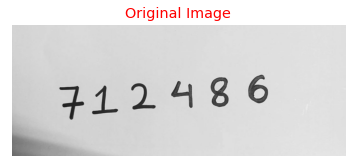

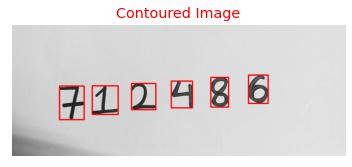

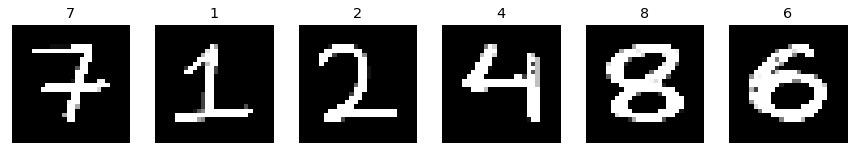

In [22]:
image = cv2.imread('digits_images/a.jpeg')

plt.xticks([])
plt.yticks([])
plt.title("Original Image",color='red')
plt.imshow(image)
plt.show()

grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 200, cv2.THRESH_BINARY_INV)

contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

# initialize the reverse flag and sort index
# handle if we need to sort in reverse
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                key=lambda b:b[1][0], reverse=False))


for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=3)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
plt.xticks([])
plt.yticks([])
plt.title("Contoured Image",color='red')
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)
figr=plt.figure(figsize=(15,4))
i=1
for digit in preprocessed_digits:
    [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
    pred=np.argmax(prediction)
    figr.add_subplot(1,len(inp),i)
    i+=1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.title(pred)